# Notebook to take a first look at the HBN data and classify subjects w/ and w/out ADHD

In [1]:
import numpy as np
import pandas as pd
from glob import glob
import os

In [2]:
brain_dir='/nobackup/scratch/Mon/jsmentch/hbn_cifti_cleaned/smoothed/'

### list all subjects to get a look at who has a dx or not

In [3]:
#load data
all_dx = np.load('../sourcedata/data/HBN/phenotype/parsed/dx_list.npy')
sub_list = np.load('../sourcedata/data/HBN/phenotype/parsed/sub_list.npy')
dx_array = np.load('../sourcedata/data/HBN/phenotype/parsed/dx_onehot.npy')

In [4]:
sub_list = list(sub_list)

In [5]:
subdirs=glob(f"{brain_dir}*/")
stripped = [s[:-1] for s in subdirs]
stripped = [os.path.basename(s) for s in stripped]
sub_ids = [s[4:] for s in stripped]

### how many subjects have dx data???

In [6]:
dx_count = 0
dne_count = 0
dx_array_RU = []

sub_list_w_dx = [] # ru subjects with diagnostic data available
dx_list_w_dx = [] # corresponding list of dx one hot data

for s in sub_ids:
    try:
        ind = sub_list.index(s)
        dx_count = dx_count+1
        sub_list_w_dx.append(sub_list[ind])
        dx_list_w_dx.append(dx_array[ind])
        
    except:
        #print("DNE")
        dne_count=dne_count+1
print(f"no dx data for: {dne_count}")
print(f"dx data for: {dx_count}")  

no dx data for: 514
dx data for: 391


Less than half at the moment. 391/904 = ~43% 7/13/21

In [7]:
dx_df = pd.DataFrame(dx_list_w_dx)
dx_df.columns = all_dx

In [8]:
dx_sum = dx_df.sum()
print(dx_sum.to_string())

ADHD-Combined Type                                                              90.0
ADHD-Hyperactive/Impulsive Type                                                 12.0
ADHD-Inattentive Type                                                           95.0
Acute Stress Disorder                                                            0.0
Adjustment Disorders                                                             9.0
Agoraphobia                                                                      1.0
Alcohol Use Disorder                                                             0.0
Autism Spectrum Disorder                                                        49.0
Avoidant/Restrictive Food Intake Disorder                                        0.0
Binge-Eating Disorder                                                            1.0
Bipolar I Disorder                                                               0.0
Bipolar II Disorder                                              

### get subjects with no dx and subjects with ASD since it is about balanced

In [9]:
list(all_dx).index("Autism Spectrum Disorder")
list(all_dx).index("No Diagnosis Given")

35

In [10]:
asd_sub_list = [] # list of RU subject ids w asd
asd_dx_list = []  # list of RU subjects w asd full dx
nt_sub_list = []  # list of RU subjects w no dx

adhd_c_sub_list = []
adhd_c_dx_list = []

for i,s in enumerate(dx_list_w_dx):
    if s[35]==1:
        #print("NT")
        nt_sub_list.append(sub_list_w_dx[i])
    if s[7]==1:
        #print("ASD")
        asd_sub_list.append(sub_list_w_dx[i])
        asd_dx_list.append(dx_list_w_dx[i])
    if s[0]==1:
        #print("ASD")
        adhd_c_sub_list.append(sub_list_w_dx[i])
        adhd_c_dx_list.append(dx_list_w_dx[i])
    

In [11]:
len(nt_sub_list)

48

### load asd subjects. load nt subjects... Then.. Compare something

In [12]:
asd_sub_list
nt_sub_list
adhd_c_sub_list

['NDARVD635FX8',
 'NDARAC853DTE',
 'NDARUZ206DRV',
 'NDARZW262ZLV',
 'NDARXL023NG9',
 'NDARYN595JMA',
 'NDARML406ZB8',
 'NDARCF247TDJ',
 'NDARPW915RGD',
 'NDARFR095UJK',
 'NDARZE850WXD',
 'NDARMZ200GVD',
 'NDARLN778RYN',
 'NDAREF164ZUJ',
 'NDARKP815KPZ',
 'NDARXK076XU8',
 'NDARFA402LMW',
 'NDARWA351ZE2',
 'NDARPV303LAX',
 'NDARRA717GYV',
 'NDARUX284GGB',
 'NDARYZ909VND',
 'NDARVP135ZGE',
 'NDARTX795AKR',
 'NDARAP782TVC',
 'NDARUN221VCJ',
 'NDARDR458MR7',
 'NDARPP622WV4',
 'NDARJW373UE3',
 'NDARJZ526HN3',
 'NDARPL201YL4',
 'NDAREK801BPB',
 'NDARYG391PMU',
 'NDARXY745NXJ',
 'NDARDF568GL5',
 'NDARKJ322ELL',
 'NDARHT095YB4',
 'NDARAD232HVV',
 'NDARDC987BMU',
 'NDARXD388TTE',
 'NDARCK647MU6',
 'NDARLL790WLF',
 'NDARNR734JZH',
 'NDARFR820KFF',
 'NDARAA948VFH',
 'NDARUB231LHN',
 'NDARRL685WB7',
 'NDARTP313AGH',
 'NDARAE358VBE',
 'NDARGA499CKF',
 'NDARHN749RW4',
 'NDARLF142AF5',
 'NDARGU395RFP',
 'NDARFT881VT6',
 'NDARRV837BZQ',
 'NDARCZ915NC1',
 'NDARKW521EMY',
 'NDAREC647MKW',
 'NDARNZ792HBN

In [13]:
#how many have both the present and despicable me

In [14]:
import os.path
prefix='/nobackup/scratch/Mon/jsmentch/hbn_cifti_cleaned/smoothed/sub-'

for s in [asd_sub_list, nt_sub_list, adhd_c_sub_list]:
    total_count=0
    DM_count=0
    TP_count=0
    for a in s:
        total_count = total_count+1
        if os.path.isfile(f'{prefix}{a}/sub-{a}_clean_task-movieDM_space-fsLR_den-91k_bold.dtseries.nii'):
            DM_count =DM_count+1
        if os.path.isfile(f'{prefix}{a}/sub-{a}_clean_task-movieTP_space-fsLR_den-91k_bold.dtseries.nii'):
            TP_count =TP_count+1
    print(f'total={total_count}, the present={TP_count}, despicable me={DM_count}')

total=49, the present=46, despicable me=35
total=48, the present=46, despicable me=43
total=90, the present=84, despicable me=71


In [15]:
#build a classifier
#train on despicable me, #test on the present
#subjects who have only seen one or the other should be used for one or the other specifically

### Plot UMAP plots of ASD vs NT participants.

In [16]:
import nibabel as nb
import umap

ModuleNotFoundError: No module named 'umap'

In [17]:
#load ASD despicable me
dm_asd = []

prefix='/nobackup/scratch/Mon/jsmentch/hbn_cifti_cleaned/smoothed/parcellated/sub-'

for s in asd_sub_list:
    im_file=f'{prefix}{s}/sub-{s}_clean_task-movieDM_space-fsLR_den-91k_bold.dtseries.nii'
    if os.path.isfile(im_file):
        img = nb.load(im_file)
        img_x = img.get_fdata()
        dm_asd.append(img_x)

dm_asd_array = np.array(dm_asd)
dm_asd_stacked = np.vstack(dm_asd)

dm_asd_array_flat = np.reshape(dm_asd_array,(len(dm_asd),270000))
dm_asd_array_flat = np.nan_to_num(dm_asd_array_flat)

In [18]:
#load NT despicable me
#load ASD despicable me
dm_nt = []

prefix='/nobackup/scratch/Mon/jsmentch/hbn_cifti_cleaned/smoothed/parcellated/sub-'

for s in nt_sub_list:
    im_file=f'{prefix}{s}/sub-{s}_clean_task-movieDM_space-fsLR_den-91k_bold.dtseries.nii'
    if os.path.isfile(im_file):
        img = nb.load(im_file)
        img_x = img.get_fdata()
        dm_nt.append(img_x)

dm_nt_array = np.array(dm_nt)
dm_nt_stacked = np.vstack(dm_nt)

dm_nt_array_flat = np.reshape(dm_nt_array,(len(dm_nt),270000))
dm_nt_array_flat = np.nan_to_num(dm_nt_array_flat)

In [19]:
adhd_c_sub_list

#load NT despicable me
#load ASD despicable me
dm_adhd_c = []

prefix='/nobackup/scratch/Mon/jsmentch/hbn_cifti_cleaned/smoothed/parcellated/sub-'

for s in adhd_c_sub_list:
    im_file=f'{prefix}{s}/sub-{s}_clean_task-movieDM_space-fsLR_den-91k_bold.dtseries.nii'
    if os.path.isfile(im_file):
        img = nb.load(im_file)
        img_x = img.get_fdata()
        dm_adhd_c.append(img_x)

dm_adhd_c_array = np.array(dm_adhd_c)
dm_adhd_c_stacked = np.vstack(dm_adhd_c)

dm_adhd_c_array_flat = np.reshape(dm_adhd_c_array,(len(dm_adhd_c),270000))
dm_adhd_c_array_flat = np.nan_to_num(dm_adhd_c_array_flat)

In [20]:
len(dm_asd),len(dm_nt),len(dm_adhd_c)

(35, 43, 71)

In [21]:
dm_asd_nt_adhd = []
dm_asd_nt_adhd.append(dm_asd_array_flat)
dm_asd_nt_adhd.append(dm_nt_array_flat)
dm_asd_nt_adhd.append(dm_adhd_c_array_flat)

dm_asd_nt_adhd= np.vstack(dm_asd_nt_adhd)


In [22]:
reducer = umap.UMAP()
embedding = reducer.fit_transform(dm_asd_nt_adhd)
embedding.shape

(149, 2)

In [23]:
from matplotlib import pyplot as plt

Text(0.5, 1.0, 'UMAP embedding of MMP parcellation ptseries - HBN - despicable me')

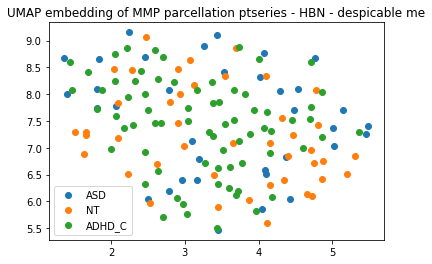

In [24]:
plt.scatter(embedding[:len(dm_asd),0],embedding[:len(dm_asd),1],label='ASD')

plt.scatter(embedding[len(dm_asd):len(dm_asd)+len(dm_nt),0],embedding[len(dm_asd):len(dm_asd)+len(dm_nt),1],label='NT')

plt.scatter(embedding[len(dm_asd)+len(dm_nt):,0],embedding[len(dm_asd)+len(dm_nt):,1],label='ADHD_C')

plt.legend()

plt.title(f'UMAP embedding of MMP parcellation ptseries - HBN - despicable me')

### now try a simple RNN

In [22]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from sklearn.preprocessing import StandardScaler
import pandas as pd
import nibabel as nb
import hrf_tools
#from analysis import load_data_HCP_MMP

gpu_devices = tf.config.experimental.list_physical_devices("GPU")
for device in gpu_devices:
    tf.config.experimental.set_memory_growth(device, True)

In [23]:
dm_nt_array.shape

(43, 750, 360)

In [24]:
dm_asd_array.shape

(35, 750, 360)

In [25]:
np.vstack(dm_nt_array[:20])
np.vstack(dm_asd_array[:20])

array([[-0.14005877, -0.75192463,  2.01465702, ...,  1.84527254,
        -1.75058997, -3.60641956],
       [-0.08428697, -0.53076327,  1.41497588, ...,  1.43260896,
        -1.38651407, -3.04055452],
       [-0.02679894, -0.33298734,  0.86819297, ...,  1.0438118 ,
        -1.04963601, -2.49997902],
       ...,
       [-0.39564589, -0.82064456, -0.18509397, ...,  0.16148756,
         0.10368404,  1.02952588],
       [-0.65096152, -0.83261776, -0.20334077, ...,  0.26565307,
        -0.19565099,  1.24256957],
       [-0.93057227, -0.81697869, -0.21048029, ...,  0.38570985,
        -0.54546338,  1.46624613]])

In [26]:
#NT=0 ASD=1
#TRAINING SET
X_train = []
X_train.append(np.vstack(dm_nt_array[:20]))
X_train.append(np.vstack(dm_asd_array[:20]))
X_train = np.vstack(X_train)

Y_train = np.ones( (30000,1) )
Y_train[15000:]=0

#VALIDATION SET
X_val = []
X_val.append(np.vstack(dm_nt_array[20:25]))
X_val.append(np.vstack(dm_asd_array[20:25]))
X_val = np.vstack(X_val)

Y_val = np.ones( (X_val.shape[0],1) )
Y_val[ int(X_val.shape[0]/2): ]=0

#TEST SET
X_test = []
X_test.append(np.vstack(dm_nt_array[25:]))
Y_test1 = np.zeros( (np.vstack(dm_nt_array[25:]).shape[0],1) )

X_test.append(np.vstack(dm_asd_array[25:]))
Y_test2 = np.ones( (np.vstack(dm_asd_array[25:]).shape[0],1) )


X_test = np.vstack(X_test)

Y_test=[]
Y_test.append(Y_test1)
Y_test.append(Y_test2)
Y_test=np.vstack(Y_test)



#for each class:
#train on 20
#val on 5
#test on remainder
# X_val
# X_test


In [27]:
X_train=np.nan_to_num(X_train)
X_test=np.nan_to_num(X_test)
X_val=np.nan_to_num(X_val)


In [28]:
print(f'X_train = {X_train.shape}')
print(f'Y_train = {Y_train.shape}')

print(f'X_val = {X_val.shape}')
print(f'Y_val = {Y_val.shape}')

print(f'X_test = {X_test.shape}')
print(f'Y_test = {Y_test.shape}')

X_train = (30000, 360)
Y_train = (30000, 1)
X_val = (7500, 360)
Y_val = (7500, 1)
X_test = (21000, 360)
Y_test = (21000, 1)


In [41]:
# set Batch size and dimensions
batch_size = 750
time_steps = 250
input_units = 360
input_shape = (time_steps,input_units)

In [42]:
#https://keras.io/api/preprocessing/timeseries/
dataset_train = tf.keras.preprocessing.timeseries_dataset_from_array(data = X_train, 
                                                     targets = Y_train, 
                                                    sequence_length=time_steps,
                                                     batch_size = batch_size)
dataset_val = tf.keras.preprocessing.timeseries_dataset_from_array(data = X_val, 
                                                     targets = Y_val, 
                                                    sequence_length=time_steps,
                                                     batch_size = batch_size)

dataset_test = tf.keras.preprocessing.timeseries_dataset_from_array(data = X_val, 
                                                     targets = Y_val, 
                                                    sequence_length=time_steps,
                                                     batch_size = batch_size)

In [43]:
dataset_train

<BatchDataset shapes: ((None, None, 360), (None, 1)), types: (tf.float64, tf.float64)>

In [56]:
model = keras.Sequential()
# Add an Embedding layer expecting input vocab of size 1000, and
# output embedding dimension of size 64.
#model.add(layers.Embedding(input_dim=1024, output_dim=1024))

model.add(keras.Input(shape=input_shape)) #omit beacuse of bug
#model.add(layers.Dropout(0.1))
# Add a LSTM layer with 128 internal units.
#model.add(layers.LSTM(32,return_sequences=True))#,batch_input_shape=(batch_size, time_steps, input_units)))
model.add(layers.GRU(64,return_sequences=True))#,batch_input_shape=(batch_size, time_steps, input_units)))

#model.add(layers.LSTM(64))#,batch_input_shape=(batch_size, time_steps, input_units)))
# model.add(layers.GRU(64))#,batch_input_shape=(batch_size, time_steps, input_units)))



# model.add(layers.Dense(360,activation='relu'))
# model.add(layers.Dropout(0.1))
# model.add(layers.Dense(360,activation='relu'))
# model.add(layers.Dropout(0.1))
# model.add(layers.Dense(180,activation='relu'))
# model.add(layers.Dropout(0.1))
# model.add(layers.Dense(90,activation='relu'))
# model.add(layers.Dropout(0.1))
# model.add(layers.Dense(45,activation='relu'))
# model.add(layers.Dropout(0.1))
# model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.GlobalAveragePooling1D())
#model.add(layers.Dense(360))

#model.add(layers.AveragePooling1D(pool_size=32,strides=None,data_format='channels_last'))

#model.add(layers.UpSampling1D(size=10))
#model.add(layers.Dense(17049))
#model.add(layers.Dense(128))
model.add(layers.Dense(1,activation='sigmoid')) #1 and sigmoid because doing binary classification
#model.add(layers.Dense(360))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_1 (GRU)                  (None, 250, 64)           81792     
_________________________________________________________________
dropout_3 (Dropout)          (None, 250, 64)           0         
_________________________________________________________________
global_average_pooling1d_3 ( (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 81,857
Trainable params: 81,857
Non-trainable params: 0
_________________________________________________________________


In [57]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, restore_best_weights=True, patience=50)

model.compile(
    #loss=keras.losses.MeanSquaredError(reduction="auto", name="mean_squared_error"),
    loss=keras.losses.BinaryCrossentropy(),
    optimizer="adadelta",
    metrics=['accuracy']
)

In [58]:
history = model.fit(dataset_train,epochs = 200, validation_data=dataset_val, callbacks = [es])

Epoch 1/200
40/40 [==============================] - 26s 608ms/step - loss: 0.6918 - accuracy: 0.5127 - val_loss: 0.6939 - val_accuracy: 0.4877
Epoch 2/200
40/40 [==============================] - 24s 597ms/step - loss: 0.6917 - accuracy: 0.5096 - val_loss: 0.6939 - val_accuracy: 0.4879
Epoch 3/200
40/40 [==============================] - 24s 597ms/step - loss: 0.6915 - accuracy: 0.5105 - val_loss: 0.6939 - val_accuracy: 0.4881
Epoch 4/200
40/40 [==============================] - 24s 596ms/step - loss: 0.6914 - accuracy: 0.5128 - val_loss: 0.6939 - val_accuracy: 0.4879
Epoch 5/200
40/40 [==============================] - 24s 597ms/step - loss: 0.6915 - accuracy: 0.5141 - val_loss: 0.6939 - val_accuracy: 0.4881
Epoch 6/200
40/40 [==============================] - 24s 596ms/step - loss: 0.6915 - accuracy: 0.5145 - val_loss: 0.6939 - val_accuracy: 0.4882
Epoch 7/200
40/40 [==============================] - 24s 596ms/step - loss: 0.6915 - accuracy: 0.5111 - val_loss: 0.6939 - val_accuracy:

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


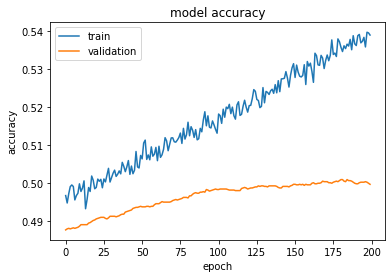

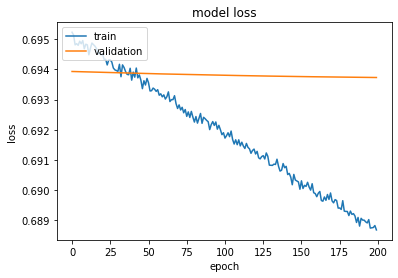

In [59]:
from matplotlib import pyplot as plt
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [39]:
model.evaluate(dataset_test)

10/10 [==============================] - 2s 160ms/step - loss: 0.6933 - accuracy: 0.4930


[0.6932518482208252, 0.49295395612716675]